In [6]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pywaffle import Waffle


# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)
# see numbers after decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
%%R

require('tidyverse')
require('ggplot2')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [9]:
df = pd.read_csv('FAOSTAT_data_en_3-22-2023.csv')
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2012,2012,ha,13490.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2013,2013,ha,14114.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2014,2014,ha,13703.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2015,2015,ha,14676.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2016,2016,ha,19481.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196890,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2017,2017,tonnes,38715.00,A,Official figure
196891,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2018,2018,tonnes,45000.00,E,Estimated value
196892,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2019,2019,tonnes,94685.00,A,Official figure
196893,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2020,2020,tonnes,212530.00,A,Official figure


In [10]:
df.columns = df.columns.str.replace("Area", "Country")
df.columns

Index(['Domain Code', 'Domain', 'Country Code (M49)', 'Country',
       'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [11]:
df.Item = df.Item.str.replace(",", "")

In [12]:
df.Value.dtypes

dtype('float64')

### Splitting data into production data and harvest data

#### HARVEST AREA

In [13]:
df_harvest = df[df.Element == "Area harvested"].reset_index(drop=True)
df_harvest

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2012,2012,ha,13490.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2013,2013,ha,14114.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2014,2014,ha,13703.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2015,2015,ha,14676.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2016,2016,ha,19481.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97895,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,111.00,Wheat,2017,2017,ha,22070.00,A,Official figure
97896,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,111.00,Wheat,2018,2018,ha,16700.00,I,Imputed value
97897,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,111.00,Wheat,2019,2019,ha,24186.00,A,Official figure
97898,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,111.00,Wheat,2020,2020,ha,44466.00,A,Official figure


### Summary stats of harvest area of all primary crops in all countries (Unit tonnes)

In [16]:
df_harvest = df_harvest[df_harvest.Value != 0]
df_harvest

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2012,2012,ha,13490.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2013,2013,ha,14114.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2014,2014,ha,13703.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2015,2015,ha,14676.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,Almonds in shell,2016,2016,ha,19481.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97895,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,111.00,Wheat,2017,2017,ha,22070.00,A,Official figure
97896,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,111.00,Wheat,2018,2018,ha,16700.00,I,Imputed value
97897,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,111.00,Wheat,2019,2019,ha,24186.00,A,Official figure
97898,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,111.00,Wheat,2020,2020,ha,44466.00,A,Official figure


In [173]:
df_harvest.query("Country == 'Peru' & Item == 'Blueberries'").reset_index(drop=True).to_csv("Peru_harvest.csv", index=False)

#### PRODUCTION

In [19]:
df_production = df[df.Element == "Production"].reset_index(drop=True)
df_production

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2012,2012,tonnes,62000.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2013,2013,tonnes,42215.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2014,2014,tonnes,27400.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2015,2015,tonnes,24246.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2016,2016,tonnes,32843.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98990,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2017,2017,tonnes,38715.00,A,Official figure
98991,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2018,2018,tonnes,45000.00,E,Estimated value
98992,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2019,2019,tonnes,94685.00,A,Official figure
98993,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2020,2020,tonnes,212530.00,A,Official figure


In [20]:
# df_production.query('Item == "Coffee green" & Year == 2021').sort_values(by='Value', ascending=False)

### Summary stats of prouction of all primary crops in all countries (Unit tonnes)

In [21]:
df_production = df_production[df_production.Value != 0]
df_production

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2012,2012,tonnes,62000.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2013,2013,tonnes,42215.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2014,2014,tonnes,27400.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2015,2015,tonnes,24246.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.00,Almonds in shell,2016,2016,tonnes,32843.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98990,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2017,2017,tonnes,38715.00,A,Official figure
98991,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2018,2018,tonnes,45000.00,E,Estimated value
98992,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2019,2019,tonnes,94685.00,A,Official figure
98993,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2020,2020,tonnes,212530.00,A,Official figure


In [22]:
df_production.groupby("Country").agg({'Value': ['mean', 'count', 'min', 'max']})

Value                         
                                         mean count    min         max
Country                                                               
Afghanistan                         281355.72   357   2.10  5370259.00
Albania                              46790.28   585  12.10   414270.80
Algeria                             380018.24   596  12.00  5020249.00
Angola                              677914.72   310 400.00 16411674.00
Antigua and Barbuda                    514.79   228   1.80     6738.63
...                                       ...   ...    ...         ...
Venezuela (Bolivarian Republic of)  233282.08   580 136.00  7301702.00
Viet Nam                           2504303.82   437  71.63 45090561.89
Yemen                                52833.61   531 235.00   459241.00
Zambia                              370287.50   319  50.72  5102117.71
Zimbabwe                             85980.56   740   9.49  3960000.00

[200 rows x 4 columns]

In [23]:
df_production.columns

Index(['Domain Code', 'Domain', 'Country Code (M49)', 'Country',
       'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [24]:
df_production.groupby(['Country', 'Year']).agg({'Value': ['mean', 'count', 'min', 'max']})

Value                        
                      mean count    min        max
Country     Year                                  
Afghanistan 2012 260280.49    35 250.00 5050000.00
            2013 265086.94    35 560.00 5169235.00
            2014 287756.88    35 393.00 5370259.00
            2015 257670.42    36   5.00 4673040.00
            2016 285715.30    36   6.00 4555110.00
...                    ...   ...    ...        ...
Zimbabwe    2017  84531.50    74   9.98 3101000.00
            2018  94204.80    74   9.49 3582994.00
            2019  80133.05    74   9.73 3562000.00
            2020  91195.22    74   9.73 3543771.00
            2021  95665.19    74   9.65 3450000.00

[2000 rows x 4 columns]

### How has world fruit production changes in the 10 years between 2012 and 2021?

* This following steps are to check which crop saw maximum growth in number of producing countries

In [25]:
#Getting number of countries producing each item (crop) in 2012

country_count_2012 = df_production[df_production['Year'] == 2012].groupby(["Item"]).agg({'Country': ['count'], 'Value': ['sum']})
country_count_2012

,Country,Value
,count,sum
Item,,
Abaca manila hemp raw,6,104783.92
Agave fibres raw n.e.c.,8,40965.00
Almonds in shell,48,2956104.51
Anise badian coriander cumin caraway fennel and juniper berries raw,40,970984.96
Apples,95,117090596.95
...,...,...
Walnuts in shell,56,3088722.70
Watermelons,117,156690121.31


In [26]:
#Getting number of countries producing each item (crop) in 2021

country_count_2021 = df_production[df_production['Year'] == 2021].groupby(["Item"]).agg({'Country': ['count'], 'Value': ['sum']})
country_count_2021

,Country,Value
,count,sum
Item,,
Abaca manila hemp raw,6,107309.24
Agave fibres raw n.e.c.,8,40742.56
Almonds in shell,47,4038998.05
Anise badian coriander cumin caraway fennel and juniper berries raw,31,2749353.89
Apples,96,139129216.15
...,...,...
Walnuts in shell,55,4600172.84
Watermelons,122,162648256.33


In [27]:
#Merging the two - 2012 and 2021

country_count_12_and_21 = country_count_2021.merge(country_count_2012, on='Item')
country_count_12_and_21

,Country_x,Value_x,Country_y,Value_y
,count,sum,count,sum
Item,,,,
Abaca manila hemp raw,6,107309.24,6,104783.92
Agave fibres raw n.e.c.,8,40742.56,8,40965.00
Almonds in shell,47,4038998.05,48,2956104.51
Anise badian coriander cumin caraway fennel and juniper berries raw,31,2749353.89,40,970984.96
Apples,96,139129216.15,95,117090596.95
...,...,...,...,...
Walnuts in shell,55,4600172.84,56,3088722.70
Watermelons,122,162648256.33,117,156690121.31


In [28]:
#Cleaning the headers from pivot table

country_count_12_and_21.columns = country_count_12_and_21.columns.droplevel(level=0)

In [29]:
#Cleaning the headers from pivot table

country_count_12_and_21 = country_count_12_and_21.reset_index()

In [30]:
#Cleaning the headers from pivot table

headers = [ 'item', 'country_count_21', '21_production', 'country_count_12', '12_production']

In [31]:
#Cleaning the headers from pivot table

country_count_12_and_21.columns = headers

In [32]:
#Getting the difference between countries producing each crop in 2021 and 2012

country_count_12_and_21['difference'] = country_count_12_and_21['country_count_21'] - country_count_12_and_21['country_count_12']

In [33]:
#Getting the change in average production of each crop in 2021 and 2012

country_count_12_and_21['production_change'] = country_count_12_and_21['21_production'] - country_count_12_and_21['12_production']

In [34]:
#Sorting it by the difference in number and setting it in descending order 
#Resulting table shows top 10 growing crops between 2012 and 2021 based on number of countries producing them

country_count_12_and_21.sort_values(by='difference', ascending=False).head(10).to_csv('more_producers.csv', index=False)

In [35]:
country_count_12_and_21.sort_values(by='difference', ascending=False).head(10)

,item,country_count_21,21_production,country_count_12,12_production,difference,production_change
99,Other pome fruits,12,130901.08,2,44600.00,10,86301.08
14,Blueberries,33,1113260.61,26,482785.93,7,630474.68
98,Other oil seeds n.e.c.,63,2764179.90,56,2447299.83,7,316880.07
122,Pumpkins squash and gourds,121,31223860.68,114,30975134.30,7,248726.38
100,Other pulses n.e.c.,111,4701842.28,105,4194128.05,6,507714.23
21,Cantaloupes and other melons,98,42689153.71,92,36674005.29,6,6015148.42
48,Eggplants (aubergines),94,96105331.86,88,75022487.15,6,21082844.71
117,Plantains and cooking bananas,52,45321643.02,46,29905415.37,6,15416227.65
9,Avocados,70,8810452.45,64,4418495.69,6,4391956.76
104,Other tropical fruits n.e.c.,77,29962092.52,72,26511306.57,5,3450785.95


In [36]:
#country_count_12_and_21.sort_values(by='production_change', ascending=False).head(10)

In [37]:
#Add column for change in percent of production in 10 years

country_count_12_and_21['percent_change'] = country_count_12_and_21['production_change'] / country_count_12_and_21['12_production'] * 100

In [38]:
#Check which single crop had maximum percent change in producer countries

country_count_12_and_21.sort_values(by='difference', ascending=False).reset_index(drop=True).head(10)

,item,country_count_21,21_production,country_count_12,12_production,difference,production_change,percent_change
0,Other pome fruits,12,130901.08,2,44600.00,10,86301.08,193.50
1,Blueberries,33,1113260.61,26,482785.93,7,630474.68,130.59
2,Other oil seeds n.e.c.,63,2764179.90,56,2447299.83,7,316880.07,12.95
3,Pumpkins squash and gourds,121,31223860.68,114,30975134.30,7,248726.38,0.80
4,Other pulses n.e.c.,111,4701842.28,105,4194128.05,6,507714.23,12.11
5,Cantaloupes and other melons,98,42689153.71,92,36674005.29,6,6015148.42,16.40
6,Eggplants (aubergines),94,96105331.86,88,75022487.15,6,21082844.71,28.10
7,Plantains and cooking bananas,52,45321643.02,46,29905415.37,6,15416227.65,51.55
8,Avocados,70,8810452.45,64,4418495.69,6,4391956.76,99.40
9,Other tropical fruits n.e.c.,77,29962092.52,72,26511306.57,5,3450785.95,13.02


In [66]:
#Check which single crop had maximum percent change in production

country_count_12_and_21.sort_values(by='percent_change', ascending=False).reset_index(drop=True).head(10).to_csv('blue_growth.csv', index=False)

### Analysing Blueberries

In [63]:
blueberries = df_production[df_production.Item.str.contains("Blueberries")].reset_index(drop=True)
blueberries

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
3480,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2012,2012,tonnes,3677.86,I,Imputed value
3481,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2013,2013,tonnes,4255.14,I,Imputed value
3482,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2014,2014,tonnes,5019.67,I,Imputed value
3483,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2015,2015,tonnes,5821.55,I,Imputed value
3484,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2016,2016,tonnes,6810.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95368,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,1355.01,Blueberries,2017,2017,tonnes,653.54,I,Imputed value
95369,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,1355.01,Blueberries,2018,2018,tonnes,675.37,I,Imputed value
95370,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,1355.01,Blueberries,2019,2019,tonnes,654.08,E,Estimated value
95371,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,1355.01,Blueberries,2020,2020,tonnes,661.00,E,Estimated value


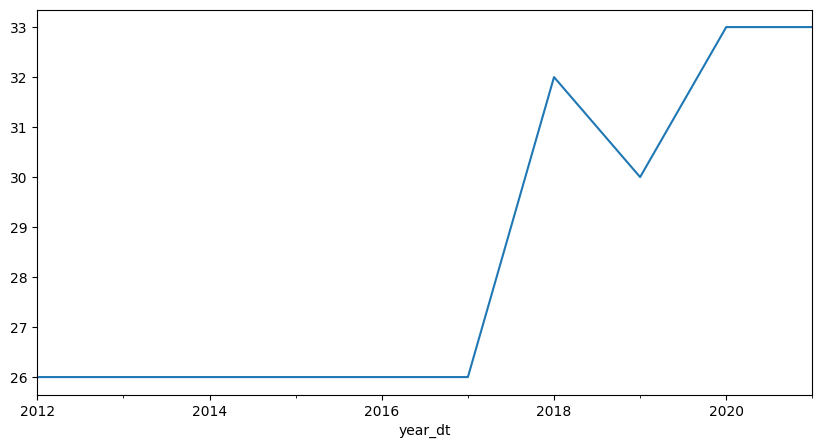

In [134]:
plt.figure(figsize=(10,5))

bar = blueberries.resample('Y', on='year_dt').Country.count().plot(kind='line')

In [137]:
blueberries.groupby('Year').Country.count()

Year
2012    26
2013    26
2014    26
2015    26
2016    26
2017    26
2018    32
2019    30
2020    33
2021    33
Name: Country, dtype: int64

In [138]:
blueberries.groupby('Year').Value.sum()

Year
2012    482785.93
2013    517283.46
2014    618380.04
2015    633119.79
2016    738920.12
2017    702364.23
2018    801912.68
2019   1017250.30
2020    995270.65
2021   1113260.61
Name: Value, dtype: float64

In [149]:
blueberries.resample('Y', on=['year_dt' & 'Country']).Value.sum().plot(kind='line')

TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [147]:
blueberries[blueberries['Year'] == 2019].groupby('Country').Value.sum()

Country
Australia                    6288.50
Austria                      1350.00
Belgium                       700.00
Canada                     176490.00
Chile                      150470.32
Croatia                       360.00
Denmark                       130.00
Finland                       200.00
Germany                     14850.00
Hungary                        40.00
Latvia                        470.00
Lithuania                     410.00
Mexico                      48998.58
Morocco                        70.70
Netherlands                 11060.00
New Zealand                  3659.12
Norway                         38.00
Peru                       147900.00
Poland                      34770.00
Portugal                    15160.00
Romania                       610.00
Russian Federation           3500.00
Slovakia                      130.00
Slovenia                      290.00
Spain                       53380.00
Sweden                         90.00
Switzerland                   

In [158]:
blueberries.head(20)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,year_dt
3480,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2012,2012,tonnes,3677.86,I,Imputed value,2012-01-01
3481,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2013,2013,tonnes,4255.14,I,Imputed value,2013-01-01
3482,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2014,2014,tonnes,5019.67,I,Imputed value,2014-01-01
3483,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2015,2015,tonnes,5821.55,I,Imputed value,2015-01-01
3484,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2016,2016,tonnes,6810.00,A,Official figure,2016-01-01
3485,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2017,2017,tonnes,5883.74,E,Estimated value,2017-01-01
3486,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2018,2018,tonnes,6171.76,E,Estimated value,2018-01-01
3487,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2019,2019,tonnes,6288.50,E,Estimated value,2019-01-01
3488,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2020,2020,tonnes,6114.67,E,Estimated value,2020-01-01
3489,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2021,2021,tonnes,6191.64,E,Estimated value,2021-01-01


In [159]:
berry= pd.read_csv('year-country-wise-blue-production.csv')
berry

,Country,Year,Value
0,Australia,2012,3677.86
1,Australia,2013,4255.14
2,Australia,2014,5019.67
3,Australia,2015,5821.55
4,Australia,2016,6810.00
...,...,...,...
279,Uzbekistan,2017,653.54
280,Uzbekistan,2018,675.37
281,Uzbekistan,2019,654.08
282,Uzbekistan,2020,661.00


In [162]:
blue21 = berry[berry.Year == 2021].reset_index(drop=True)
blue21.

,Country,Year,Value
0,Australia,2021,6191.64
1,Austria,2021,1740.00
2,Belgium,2021,830.00
3,Bulgaria,2021,110.00
4,Canada,2021,146551.00
5,Chile,2021,122794.82
6,Croatia,2021,540.00
7,Denmark,2021,120.00
8,Finland,2021,190.00
9,France,2021,7916.00
